### 190234E HEWASURA G.I.

### EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering

### (01)

([], [])

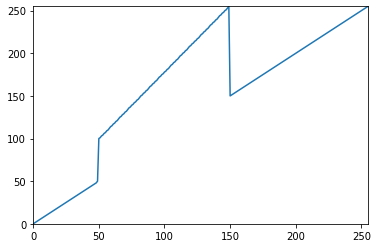

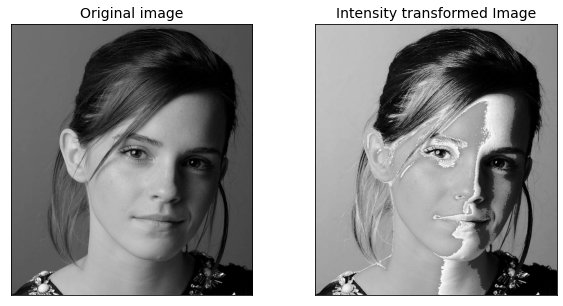

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)

plt.plot(t)
plt.xlim(0,255)
plt.ylim(0,255)

g = cv.LUT(img ,t)
image = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(10,5))

axes[0].imshow(f, cmap='gray',vmin=0,vmax=255)
axes[0].set_title("Original image",fontsize = 14)
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image, cmap='gray')
axes[1].set_title('Intensity transformed Image',fontsize = 14)
axes[1].set_xticks([]), axes[1].set_yticks([])

### (02)

([], [])

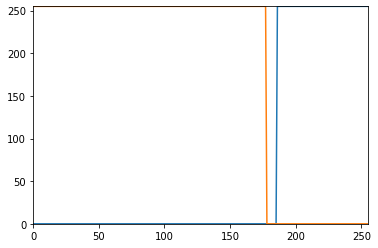

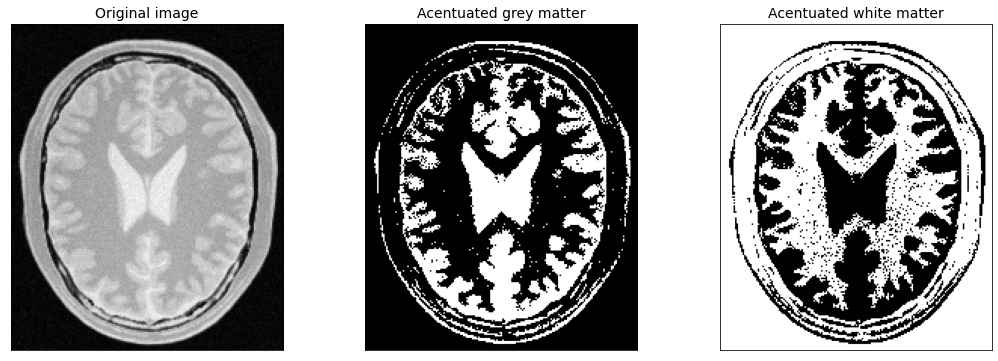

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert f is not None

t1_ = np.linspace(0,0,186)
t2_ = np.linspace(255,255,70)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t1 = np.concatenate((t1_,t2_),axis = 0).astype(np.uint8)

plt.plot(t1)
plt.xlim(0,255)
plt.ylim(0,255)

g1 = cv.LUT(img ,t1)
image1 = cv.cvtColor(g1, cv.COLOR_BGR2RGB)

t1__ = np.linspace(255,255,178)
t2__ = np.linspace(0,0,78)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t_1 = np.concatenate((t1__,t2__),axis = 0).astype(np.uint8)

plt.plot(t_1)
plt.xlim(0,255)
plt.ylim(0,255)

g_1 = cv.LUT(img ,t_1)
image_1 = cv.cvtColor(g_1, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(f, cmap='gray',vmin=0,vmax=255)
axes[0].set_title("Original image",fontsize = 14)
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image1, cmap='gray')
axes[1].set_title('Acentuated grey matter',fontsize = 14)
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(image_1, cmap='gray')
axes[2].set_title('Acentuated white matter',fontsize = 14)
axes[2].set_xticks([]), axes[1].set_yticks([])

### (03)

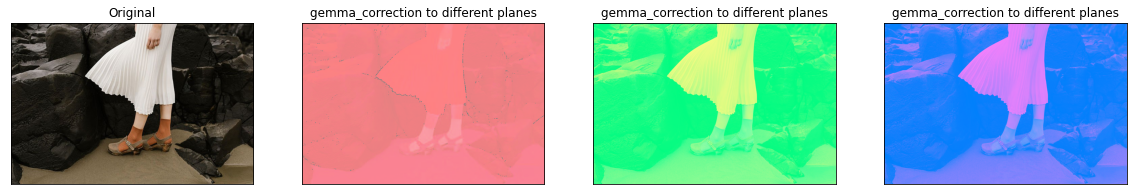

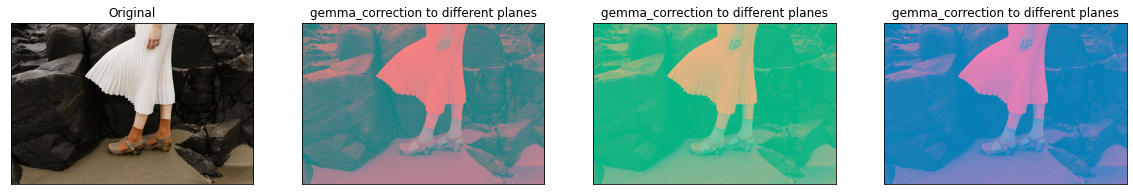

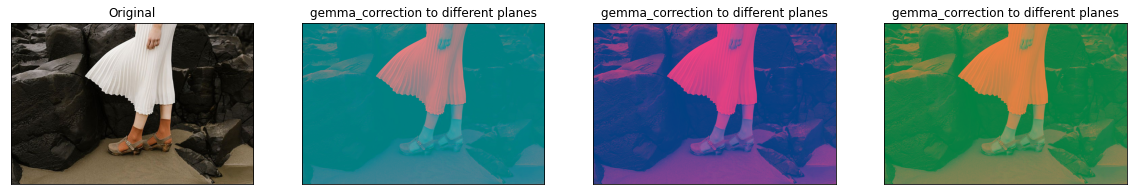

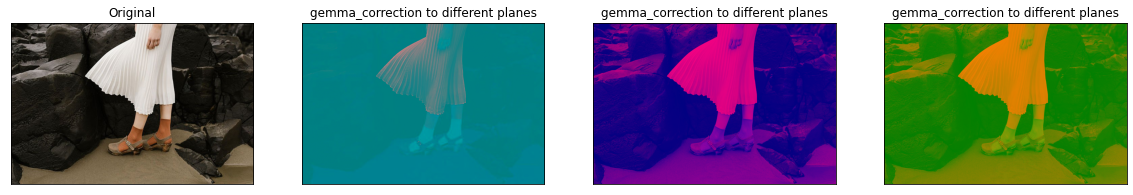

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


gemma = [0.02,0.5,2,8]
for l in gemma:
    
    t = np.array([(p/255)**l*255 for p in range(0,256)]).astype(np.uint8)
    f = cv.imread(r"./highlights_and_shadows.jpg", cv.IMREAD_COLOR)
    assert f is not None
    img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1,4, sharex='all', sharey='all', figsize=(20,5))
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].set_xticks([]), axes[0].set_yticks([])


    for i in range(0,3):
        f = cv.imread(r"./highlights_and_shadows.jpg", cv.IMREAD_COLOR)
        assert f is not None
        img = cv.cvtColor(f, cv.COLOR_BGR2Lab)
        for j in range(0,len(img)):
            for k in range(0,len(img[0])):
                img[j][k][i]= t[img[j][k][i]]
        
        image = cv.cvtColor(img, cv.COLOR_Lab2RGB)
        axes[i+1].imshow(img)
        axes[i+1].set_title("gemma_correction to different planes")
        axes[i+1].set_xticks([]), axes[0].set_yticks([])


### (03)(b)

### (04)

([], [])

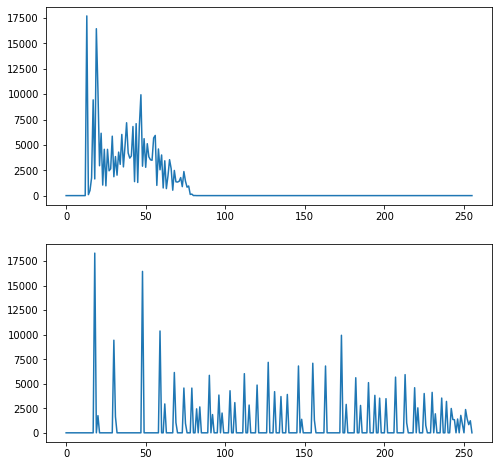

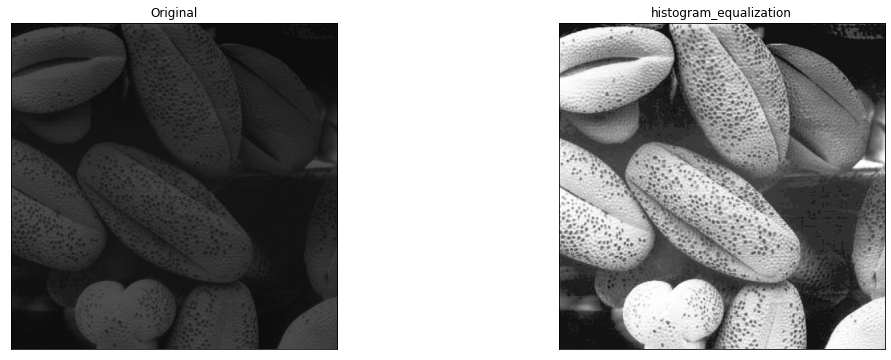

In [6]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def equalize_Hist(f):
    histogram_array = np.bincount(f.flatten(), minlength=256)
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    chistogram_array = np.cumsum(histogram_array)
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
    img_list = list(f.flatten())
    eq_img_list = [transform_map[p] for p in img_list]
    eq_img_array = np.reshape(np.asarray(eq_img_list), f.shape)
    return eq_img_array;
    

f = cv.imread( r'./shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None

hist_f = cv.calcHist([f],[0],None,[256],[0,256])
g = equalize_Hist(f)

hist_g = cv.calcHist([g],[0],None,[256],[0,256])
fig,ax = plt.subplots(2,1,figsize = (8,8))
img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

ax[0].plot(hist_f)
image = cv.cvtColor(g, cv.COLOR_BGR2RGB)

ax[1].plot(hist_g)
fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,6))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image, cmap='gray')
axes[1].set_title('histogram_equalization')
axes[1].set_xticks([]), axes[1].set_yticks([])

### (05) zoom

### (06)

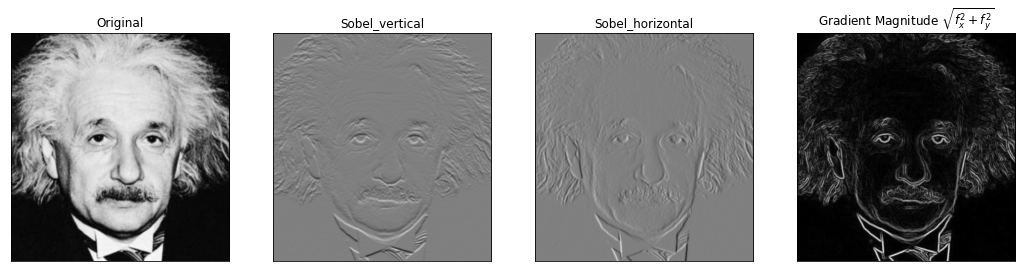

In [8]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('./einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float)
im_x = cv.filter2D(img,-1,sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float)
im_y = cv.filter2D(img,-1,sobel_h)

grad_mag = np.sqrt(im_x**2 + im_y**2)

fig, axes = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,6))
axes[0].imshow(img, cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im_x, cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('Sobel_vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(im_y, cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('Sobel_horizontal')
axes[2].set_xticks([]), axes[1].set_yticks([])
axes[3].imshow(grad_mag, cmap = "gray")
axes[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y ^ 2}$")
plt.show()

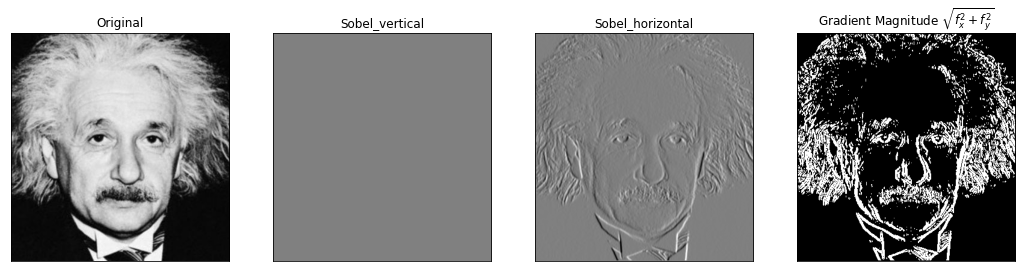

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

def conv_transform(image):
    image_copy = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_copy[i][j] = image[image.shape[0]-1-1][image.shape[1]-j-1]
    return image_copy
def conv(image,kernel):
    kernel = conv_transform(kernel)
    image_h =image.shape[0]
    image_w = image.shape[1]

    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    h = kernel_h//2
    w = kernel_w//2

    image_conv = np.zeros(image.shape)

    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            sum = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum = (sum + kernel[m][n]*image[i-h+m][j-w+n])
            image_conv[i][j] = sum
    return image_conv

def norm(img1,img2):
    img_copy = np.zeros(img1.shape)

    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            q = (img1[i][j]**2 + img2[i][j]**2)**(1/2)
            if(q>90):
                img_copy[i][j] = 255
            else:
                img_copy[i][j] = 0
    return img_copy



sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float)
im_x = conv(img,sobel_v)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float)
im_y = conv(img,sobel_h)
g_sobel = norm(im_x,im_y)


fig, axes = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,6))
axes[0].imshow(img, cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im_x, cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('Sobel_vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(im_y, cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('Sobel_horizontal')
axes[2].set_xticks([]), axes[1].set_yticks([])
axes[3].imshow(g_sobel, cmap = "gray")
axes[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y ^ 2}$")
plt.show()

### (07)

### (a)

([], [])

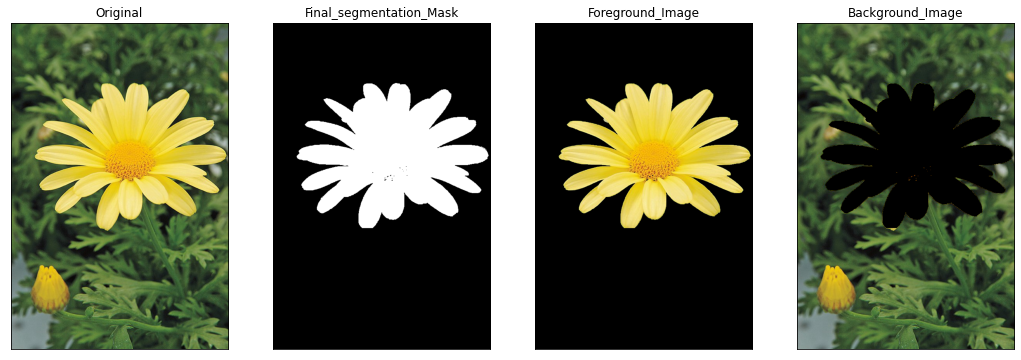

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

f = cv2.imread('./daisy.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)


bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#rect = (0,0,800,600)
rect = (10,10,700,520)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask ==0),0,1).astype('uint8')
img_ = img*mask2[:,:,np.newaxis]
img__ = img - img_
fig, axes = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,6))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(mask2, cmap='gray')
axes[1].set_title('Final_segmentation_Mask')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(img_, cmap='gray')
axes[2].set_title('Foreground_Image')
axes[2].set_xticks([]), axes[1].set_yticks([])
axes[3].imshow(img__, cmap='gray')
axes[3].set_title('Background_Image')
axes[3].set_xticks([]), axes[1].set_yticks([])




### (b)

([], [])

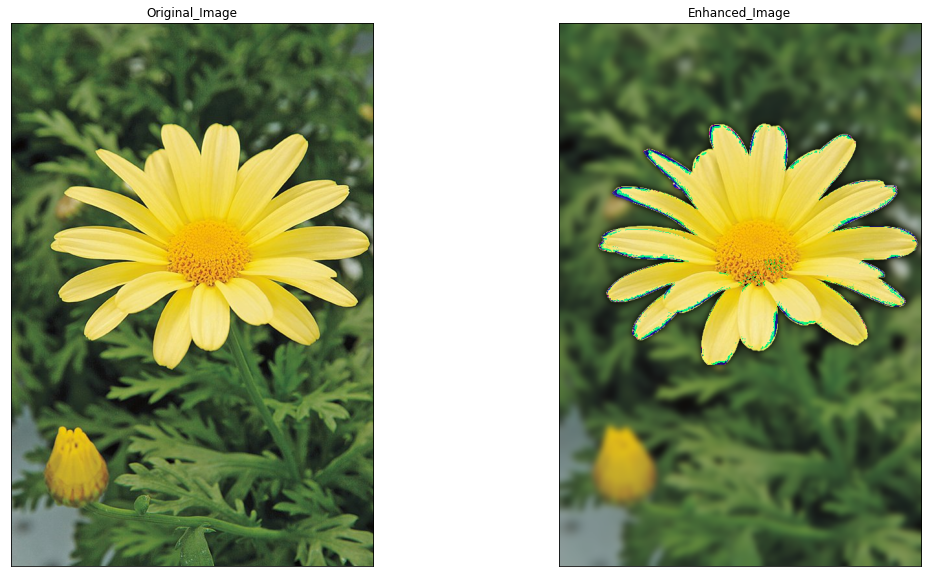

In [42]:
kernel_size = 25
sigma = 5
background_blurred = cv.GaussianBlur(img__,(kernel_size,kernel_size),sigma)
enhanced_img = background_blurred + img_
fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,10))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original_Image')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(enhanced_img, cmap='gray')
axes[1].set_title('Enhanced_Image')
axes[1].set_xticks([]), axes[1].set_yticks([])